#### Linear Regression

$MSE(X, h_{\theta}) = \frac{1}{m} \sum_{i=1}{m}(\theta^T \cdot x^{(i)}-y^{(i)})^2$

####  Normal Equation

$\hat{\theta}=(X^T \cdot X)^{-1} \cdot X^T \cdot y$

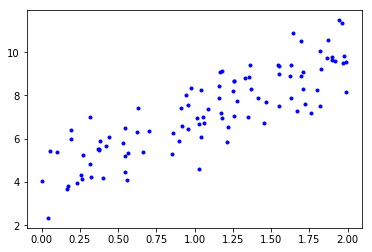

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.16291421],
       [2.8334372 ]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.16291421],
       [9.8297886 ]])

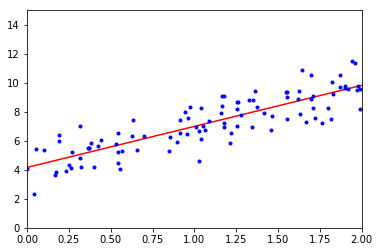

In [5]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.16291421]), array([[2.8334372]]))

In [7]:
lin_reg.predict(X_new)

array([[4.16291421],
       [9.8297886 ]])

#### Batch Gradient Descent

$\frac{\partial}{\partial \theta_{j}} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m} (\theta^{T} \cdot x^{(i)} - y^{(i)})x_{j}^{(i)}$

$\nabla_{\theta} MSE(\theta) = \frac{2}{m}X^{T} \cdot (X \cdot \theta - y)$

$\theta^{(next step)} = \theta - \eta \nabla_{\theta} MSE(\theta)$

In [8]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.16291421],
       [2.8334372 ]])

####  Stochastic Gradient Descent

In [9]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [10]:
theta

array([[4.16684054],
       [2.85674914]])

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.19831305]), array([2.87409342]))

####  Polynomial Regression

In [12]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

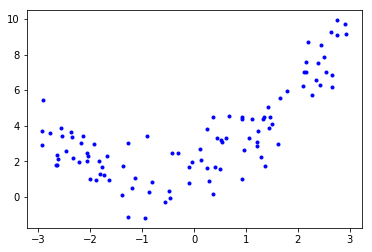

In [13]:
plt.plot(X, y, 'b.')

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [15]:
X[0]

array([-2.37679556])

In [16]:
X_poly[0]

array([-2.37679556,  5.64915712])

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.63750201]), array([[0.99875001, 0.57607336]]))

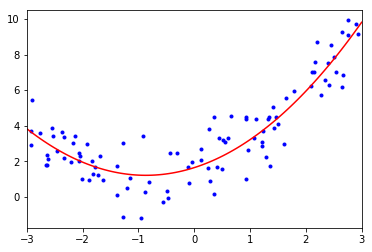

In [18]:
X_hat = np.linspace(-3, 3, 100)  
y_hat = lin_reg.coef_[0][1] * X_hat**2 + lin_reg.coef_[0][0] * X_hat + lin_reg.intercept_[0]
plt.xlim((-3, 3))
plt.plot(X, y, 'b.')
plt.plot(X_hat, y_hat, 'r-')

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=2, label='val')
    plt.legend()

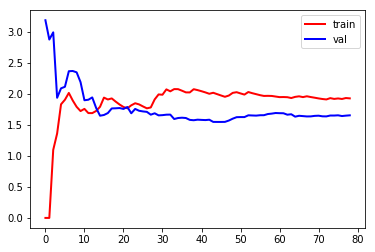

In [20]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

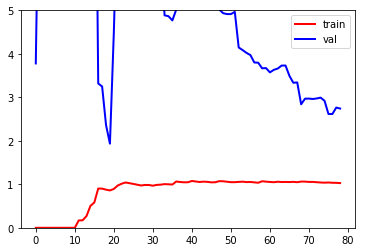

In [21]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('sgd_reg', LinearRegression())
))

plt.ylim((0, 5))
plot_learning_curves(polynomial_regression, X, y)